In [1]:

import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import missingno
import multiprocessing


In [2]:
data = pd.read_csv('./airbnb-listings.csv', sep = ';')
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,3150371,https://www.airbnb.com/rooms/3150371,20170407214119,2017-04-08,Double room + bathroom - La Latina,"Double room with own bathroom in La Latina, in...",The apartment is spacious and cozy. It is 90 m...,"Double room with own bathroom in La Latina, in...",none,La Latina is one of the most famous neighbourh...,...,10.0,10.0,10.0,NaN,NaN,flexible,1,2.33,"40.4101060805,-3.71475403418","Host Has Profile Pic,Host Identity Verified,Is..."
1,3378181,https://www.airbnb.com/rooms/3378181,20170407214119,2017-04-08,"Ópera/Plz Mayor -- A/C, elevator",Old world charm meets modern comfort in our ne...,"Designed with the traveler in mind, our one-be...",Old world charm meets modern comfort in our ne...,none,The neighborhood is steeped in history and clo...,...,10.0,10.0,10.0,NaN,NaN,strict,2,2.69,"40.4169688226,-3.70943892111","Host Has Profile Pic,Host Identity Verified,Is..."
2,2070750,https://www.airbnb.com/rooms/2070750,20170407214119,2017-04-08,Centric room with a balcony,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,none,-,...,9.0,10.0,9.0,NaN,NaN,flexible,4,0.60,"40.4097051756,-3.71356119288","Host Has Profile Pic,Host Identity Verified,Is..."
3,9832499,https://www.airbnb.com/rooms/9832499,20170407214119,2017-04-08,PLAZA DE ESPAÑA - Único - Gimnasio.,"Ubicado en el famoso edificio Torre de Madrid,...","Ubicado en el famoso edificio Torre de Madrid,...","Ubicado en el famoso edificio Torre de Madrid,...",none,NaN,...,10.0,10.0,10.0,VT-1520,NaN,strict,9,3.56,"40.4231927174,-3.71124865139","Host Is Superhost,Host Has Profile Pic,Host Id..."
4,1868170,https://www.airbnb.com/rooms/1868170,20170407214119,2017-04-08,"Loft/duplex 150m2, 3 double rooms","Huge, open plan spacious apartment in the cent...","Huge, open plan spacious apartment in the cent...","Huge, open plan spacious apartment in the cent...",none,NaN,...,10.0,10.0,9.0,NaN,NaN,moderate,1,1.13,"40.4165139326,-3.71784275295","Host Is Superhost,Host Has Profile Pic,Host Id..."


In [3]:
data.shape

(13207, 89)

## Data cleansing 

### non useful variables
1. let's remove the variables that are text description, URL or Geolocation, that we can not analyze
2. let's remove variables that have less than the 20% of the data. Like license or Has Availability. 
3. Variables que no aportan nada por ser constantes siempre - por ejemplo: el pais o la ciudad.
4. Variables redundantes: codigo postal - barrio, nombre del propietario - numero de 'listings'

In [4]:
categorical_vars_pre = set(data.columns[data.dtypes == object])
numerical_vars_pre = set(data.columns) - categorical_vars_pre
categorical_vars = list(categorical_vars_pre)
numerical_vars = list(numerical_vars_pre)

In [5]:
print(categorical_vars)

['Host Thumbnail Url', 'Thumbnail Url', 'Host Name', 'Notes', 'XL Picture Url', 'Last Review', 'Name', 'Calendar Updated', 'Listing Url', 'Features', 'First Review', 'Description', 'Street', 'Interaction', 'Transit', 'Bed Type', 'Country', 'Experiences Offered', 'Amenities', 'Neighbourhood', 'Summary', 'House Rules', 'Neighborhood Overview', 'Smart Location', 'Host Response Time', 'Geolocation', 'Market', 'Picture Url', 'Host Since', 'State', 'Country Code', 'Host Verifications', 'Neighbourhood Group Cleansed', 'Space', 'Property Type', 'Host URL', 'License', 'City', 'Host Picture Url', 'Host Neighbourhood', 'Last Scraped', 'Host About', 'Medium Url', 'Zipcode', 'Room Type', 'Access', 'Calendar last Scraped', 'Cancellation Policy', 'Host Location', 'Neighbourhood Cleansed']


In [6]:
print(numerical_vars)

['Review Scores Rating', 'Availability 30', 'Host Listings Count', 'Availability 60', 'Cleaning Fee', 'Has Availability', 'Square Feet', 'Latitude', 'Maximum Nights', 'ID', 'Calculated host listings count', 'Bathrooms', 'Review Scores Value', 'Review Scores Cleanliness', 'Host Response Rate', 'Host Total Listings Count', 'Host ID', 'Availability 90', 'Bedrooms', 'Guests Included', 'Scrape ID', 'Extra People', 'Weekly Price', 'Minimum Nights', 'Availability 365', 'Beds', 'Longitude', 'Review Scores Accuracy', 'Host Acceptance Rate', 'Number of Reviews', 'Reviews per Month', 'Monthly Price', 'Accommodates', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Checkin', 'Price', 'Security Deposit', 'Jurisdiction Names']


In [7]:
y = ['Features', 'Host Response Time', 'Property Type', 'First Review', 'Neighbourhood Group Cleansed', 'Bed Type', 'Market', 'Last Review',  'Last Scraped', 'State']
data[y].head()

,Features,Host Response Time,Property Type,First Review,Neighbourhood Group Cleansed,Bed Type,Market,Last Review,Last Scraped,State
0,"Host Has Profile Pic,Host Identity Verified,Is...",within a day,Apartment,2014-06-15,Centro,Real Bed,Madrid,2017-04-01,2017-04-08,Community of Madrid
1,"Host Has Profile Pic,Host Identity Verified,Is...",within a day,Apartment,2014-07-09,Centro,Real Bed,Madrid,2017-02-28,2017-04-08,Community of Madrid
2,"Host Has Profile Pic,Host Identity Verified,Is...",within a day,Apartment,2014-07-22,Centro,Real Bed,Madrid,2017-03-07,2017-04-08,Community of Madrid
3,"Host Is Superhost,Host Has Profile Pic,Host Id...",within an hour,Apartment,2016-01-02,Centro,Real Bed,Madrid,2017-03-31,2017-04-08,Comunidad de Madrid
4,"Host Is Superhost,Host Has Profile Pic,Host Id...",within a few hours,Apartment,2013-12-09,Centro,Real Bed,Madrid,2017-03-26,2017-04-08,Community of Madrid


In [8]:
y = ['Host Location', 'Amenities', 'Neighbourhood Cleansed', 'City', 'Smart Location', 'Host Name', 'Host Verifications', 'Calendar Updated']
data[y].head()

,Host Location,Amenities,Neighbourhood Cleansed,City,Smart Location,Host Name,Host Verifications,Calendar Updated
0,"Madrid, Community of Madrid, Spain","TV,Internet,Wireless Internet,Kitchen,Doorman,...",Palacio,Madrid,"Madrid, Spain",Daniel Y Ximena,"email,phone,reviews,jumio",4 days ago
1,"Madrid, Madrid, Spain","TV,Wireless Internet,Air conditioning,Kitchen,...",Palacio,Madrid,"Madrid, Spain",Michael,"email,phone,facebook,reviews,jumio,work_email",5 days ago
2,"Madrid, Community of Madrid, Spain","Wireless Internet,Kitchen,Pets allowed,Buzzer/...",Palacio,Madrid,"Madrid, Spain",Sergio,"email,phone,reviews,jumio",4 days ago
3,"Region of Murcia, Spain","TV,Internet,Wireless Internet,Air conditioning...",Palacio,Madrid,"Madrid, Spain",Daniel,"email,phone,facebook,reviews,jumio,work_email",today
4,"Madrid, Community of Madrid, Spain","TV,Internet,Wireless Internet,Kitchen,Pets all...",Palacio,Madrid,"Madrid, Spain",Carlos Chamarro,"email,phone,reviews,jumio",4 weeks ago


In [9]:
y =['Experiences Offered', 'Cancellation Policy', 'Zipcode', 'Host Neighbourhood', 'Country', 'Street', 'Neighbourhood', 'Country Code', 'License', 'Room Type', 'Host Since', 'Calendar last Scraped']
data[y].head()

,Experiences Offered,Cancellation Policy,Zipcode,Host Neighbourhood,Country,Street,Neighbourhood,Country Code,License,Room Type,Host Since,Calendar last Scraped
0,none,flexible,28005,Palacio,Spain,"Palacio, Madrid, Community of Madrid 28005, Spain",Palacio,ES,NaN,Private room,2014-02-03,2017-04-07
1,none,strict,28013,Palacio,Spain,"Palacio, Madrid, Community of Madrid 28013, Spain",Palacio,ES,NaN,Entire home/apt,2011-07-12,2017-04-07
2,none,flexible,NaN,La Latina,Spain,"Madrid, Community of Madrid, Spain",La Latina,ES,NaN,Private room,2013-06-19,2017-04-07
3,none,strict,NaN,Chamberí,Spain,"Malasaña, Madrid, Comunidad de Madrid, Spain",Malasaña,ES,VT-1520,Entire home/apt,2012-01-24,2017-04-07
4,none,moderate,28005,Palacio,Spain,"Palacio, Madrid, Community of Madrid 28005, Spain",Palacio,ES,NaN,Entire home/apt,2013-10-31,2017-04-07


In [10]:
categorical_vars = ['Host Response Time', 'Property Type', 'First Review', 'Neighbourhood Group Cleansed', 'Bed Type', 'Market', 'Last Review',  'Last Scraped', 'State', 'Host Location', 'Amenities', 'Neighbourhood Cleansed', 'City', 'Smart Location', 'Host Name', 'Host Verifications', 'Calendar Updated', 'Experiences Offered', 'Cancellation Policy', 'Zipcode', 'Host Neighbourhood', 'Country', 'Street', 'Neighbourhood', 'Country Code', 'License', 'Room Type', 'Host Since', 'Calendar last Scraped']
total_new = numerical_vars + categorical_vars
data = data[total_new]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13207 entries, 0 to 13206
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Review Scores Rating            10369 non-null  float64
 1   Availability 30                 13207 non-null  int64  
 2   Host Listings Count             13204 non-null  float64
 3   Availability 60                 13207 non-null  int64  
 4   Cleaning Fee                    7820 non-null   float64
 5   Has Availability                0 non-null      float64
 6   Square Feet                     519 non-null    float64
 7   Latitude                        13207 non-null  float64
 8   Maximum Nights                  13207 non-null  int64  
 9   ID                              13207 non-null  int64  
 10  Calculated host listings count  13207 non-null  int64  
 11  Bathrooms                       13158 non-null  float64
 12  Review Scores Value             

In [12]:
thresh = 0.2*len(data)
data = data.dropna(thresh = thresh, axis = 1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13207 entries, 0 to 13206
Data columns (total 63 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Review Scores Rating            10369 non-null  float64
 1   Availability 30                 13207 non-null  int64  
 2   Host Listings Count             13204 non-null  float64
 3   Availability 60                 13207 non-null  int64  
 4   Cleaning Fee                    7820 non-null   float64
 5   Latitude                        13207 non-null  float64
 6   Maximum Nights                  13207 non-null  int64  
 7   ID                              13207 non-null  int64  
 8   Calculated host listings count  13207 non-null  int64  
 9   Bathrooms                       13158 non-null  float64
 10  Review Scores Value             10339 non-null  float64
 11  Review Scores Cleanliness       10357 non-null  float64
 12  Host Response Rate              

In [14]:
categorical_vars_pre = set(data.columns[data.dtypes == object])
numerical_vars_pre = set(data.columns) - categorical_vars_pre
categorical_vars = list(categorical_vars_pre)
numerical_vars = list(numerical_vars_pre)

In [15]:
data[categorical_vars_pre].describe()

,Host Name,Last Review,First Review,Street,Bed Type,Country,Experiences Offered,Amenities,Neighbourhood,Smart Location,...,City,Host Neighbourhood,Last Scraped,Cancellation Policy,Zipcode,Room Type,Calendar Updated,Calendar last Scraped,Host Location,Neighbourhood Cleansed
count,13204,10493,10494,13207,13207,13207,13207,13100,8753,13207,...,13207,9958,13207,13207,12768,13207,13207,13207,13165,13207
unique,2930,702,1605,662,5,1,1,11072,65,2,...,1,109,1,5,76,3,57,2,503,125
top,Raquel,2017-04-02,2016-10-09,"Embajadores, Madrid, Comunidad de Madrid 28012...",Real Bed,Spain,none,"TV,Internet,Wireless Internet,Air conditioning...",Malasaña,"Madrid, Spain",...,Madrid,Malasaña,2017-04-08,strict,28012,Entire home/apt,today,2017-04-08,"Madrid, Community of Madrid, Spain",Embajadores
freq,214,741,63,590,12914,13207,13207,41,894,13192,...,13207,1001,13207,4992,2060,7903,3413,9612,8957,1844


In [16]:
for i in categorical_vars_pre:
     print(pd.crosstab(data[i], columns = 'count'))

col_0           count
Host Name            
(EMAIL HIDDEN)      2
2trust              1
ALine               1
ANA E IÑAKI         1
Aabla               1
...               ...
海                   1
熙                   4
玲                  16
逸丹                  2
锴                   1

[2930 rows x 1 columns]
col_0        count
Last Review       
2012-08-04       1
2012-09-14       1
2012-09-23       1
2013-05-06       1
2013-07-06       1
...            ...
2017-04-03     460
2017-04-04     306
2017-04-05     265
2017-04-06     170
2017-04-07     105

[702 rows x 1 columns]
col_0         count
First Review       
2010-05-10        1
2010-05-18        1
2010-05-29        1
2010-06-13        1
2010-07-06        1
...             ...
2017-04-03       12
2017-04-04        9
2017-04-05        5
2017-04-06        4
2017-04-07        1

[1605 rows x 1 columns]
col_0                                               count
Street                                                   
Acacias, Madrid, 

In [17]:
for i in categorical_vars_pre:
    rdo = data[i].describe()
    if rdo[1] == 1:
        data = data.drop(i, axis = 1)
    else:
        data = data
    

In [18]:
#in addition we are dropping stage as every AirBnb is in madrid and thus in the same state
data = data.drop('State', axis = 1)
# in the same line of thought we are dropping Zip code as we have the neighbourhood
data = data.drop('Zipcode', axis = 1)
#we are also dropping host name, as we already have number the of listings per host: 'Host Total Listings Count'
data = data.drop('Host Name', axis = 1)


In [19]:
data.describe( exclude = 'number')[1:2]>1


,Host Response Time,Property Type,First Review,Neighbourhood Group Cleansed,Bed Type,Market,Last Review,Host Location,Amenities,Neighbourhood Cleansed,Smart Location,Host Verifications,Calendar Updated,Cancellation Policy,Host Neighbourhood,Street,Neighbourhood,Room Type,Host Since,Calendar last Scraped
unique,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [20]:
#quitamos manualmente Smart Location ya que vemos que solo tiene un valor (en describe da dos por un error tipográfico)
data = data.drop('Smart Location', axis = 1)

#quitamos Calendar last Scraped ya que una no aporta info 
data = data.drop('Calendar last Scraped', axis = 1)

In [21]:
numerical_vars

['Review Scores Rating',
 'Availability 30',
 'Host Listings Count',
 'Availability 60',
 'Cleaning Fee',
 'Latitude',
 'Maximum Nights',
 'ID',
 'Calculated host listings count',
 'Bathrooms',
 'Review Scores Value',
 'Review Scores Cleanliness',
 'Host Response Rate',
 'Host Total Listings Count',
 'Host ID',
 'Availability 90',
 'Bedrooms',
 'Guests Included',
 'Scrape ID',
 'Extra People',
 'Weekly Price',
 'Minimum Nights',
 'Availability 365',
 'Beds',
 'Longitude',
 'Review Scores Accuracy',
 'Number of Reviews',
 'Reviews per Month',
 'Monthly Price',
 'Accommodates',
 'Review Scores Communication',
 'Review Scores Location',
 'Review Scores Checkin',
 'Price',
 'Security Deposit']

In [22]:
#quitos los ID menos uno y las variables de localización que quedan 

data = data.drop('Host ID', axis = 1)
data = data.drop('Scrape ID', axis = 1)
data = data.drop('Latitude', axis = 1)
data = data.drop('Longitude', axis = 1)

In [23]:
categorical_vars = set(data.columns[data.dtypes == object])
numerical_vars = set(data.columns) - categorical_vars
categorical_vars = list(categorical_vars)
numerical_vars = list(numerical_vars)

In [24]:
data['Price'].isnull().sum()

9

In [25]:
#quitamos las observaciones sin target ya que son minimas 9 de +/-13000 
data = data[data['Price'].notna()]

In [26]:
data['Price'].isnull().sum()

0

In [27]:
numerical_vars

['Review Scores Rating',
 'Availability 30',
 'Host Listings Count',
 'Availability 60',
 'Cleaning Fee',
 'Maximum Nights',
 'ID',
 'Calculated host listings count',
 'Bathrooms',
 'Review Scores Value',
 'Review Scores Cleanliness',
 'Host Response Rate',
 'Host Total Listings Count',
 'Availability 90',
 'Bedrooms',
 'Guests Included',
 'Extra People',
 'Weekly Price',
 'Minimum Nights',
 'Availability 365',
 'Beds',
 'Review Scores Accuracy',
 'Number of Reviews',
 'Reviews per Month',
 'Monthly Price',
 'Accommodates',
 'Review Scores Communication',
 'Review Scores Location',
 'Review Scores Checkin',
 'Price',
 'Security Deposit']

In [28]:
data.head()

,Review Scores Rating,Availability 30,Host Listings Count,Availability 60,Cleaning Fee,Maximum Nights,ID,Calculated host listings count,Bathrooms,Review Scores Value,...,Amenities,Neighbourhood Cleansed,Host Verifications,Calendar Updated,Cancellation Policy,Host Neighbourhood,Street,Neighbourhood,Room Type,Host Since
0,98.0,1,1.0,1,NaN,1125,3150371,1,1.0,10.0,...,"TV,Internet,Wireless Internet,Kitchen,Doorman,...",Palacio,"email,phone,reviews,jumio",4 days ago,flexible,Palacio,"Palacio, Madrid, Community of Madrid 28005, Spain",Palacio,Private room,2014-02-03
1,95.0,12,3.0,32,30.0,1125,3378181,2,1.0,10.0,...,"TV,Wireless Internet,Air conditioning,Kitchen,...",Palacio,"email,phone,facebook,reviews,jumio,work_email",5 days ago,strict,Palacio,"Palacio, Madrid, Community of Madrid 28013, Spain",Palacio,Entire home/apt,2011-07-12
2,91.0,7,4.0,37,NaN,1125,2070750,4,1.0,9.0,...,"Wireless Internet,Kitchen,Pets allowed,Buzzer/...",Palacio,"email,phone,reviews,jumio",4 days ago,flexible,La Latina,"Madrid, Community of Madrid, Spain",La Latina,Private room,2013-06-19
3,99.0,7,10.0,13,15.0,1900,9832499,9,1.0,10.0,...,"TV,Internet,Wireless Internet,Air conditioning...",Palacio,"email,phone,facebook,reviews,jumio,work_email",today,strict,Chamberí,"Malasaña, Madrid, Comunidad de Madrid, Spain",Malasaña,Entire home/apt,2012-01-24
4,96.0,6,1.0,20,20.0,1125,1868170,1,3.0,9.0,...,"TV,Internet,Wireless Internet,Kitchen,Pets all...",Palacio,"email,phone,reviews,jumio",4 weeks ago,moderate,Palacio,"Palacio, Madrid, Community of Madrid 28005, Spain",Palacio,Entire home/apt,2013-10-31


En este punto tenemos en el dataset solo las variables que nos interesan y aportan informacion al algoritmo 

## EDA and Visualization

(array([1.1012e+04, 1.7340e+03, 3.0200e+02, 7.7000e+01, 2.4000e+01,
        2.9000e+01, 1.3000e+01, 2.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([  9. ,  95.6, 182.2, 268.8, 355.4, 442. , 528.6, 615.2, 701.8,
        788.4, 875. ]),
 <a list of 10 Patch objects>)

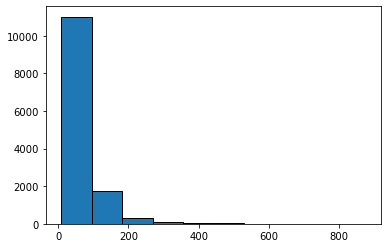

In [29]:
plt.hist(data['Price'], edgecolor = 'black')

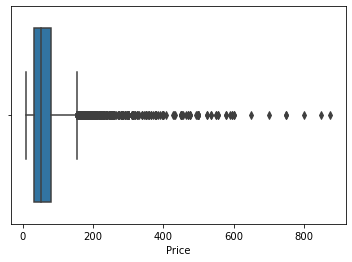

In [30]:

sns.boxplot(x=data['Price'])
plt.show()

In [31]:
len(numerical_vars)

31

## Dimensionality reduction

#### 1. Highly correlated variables 

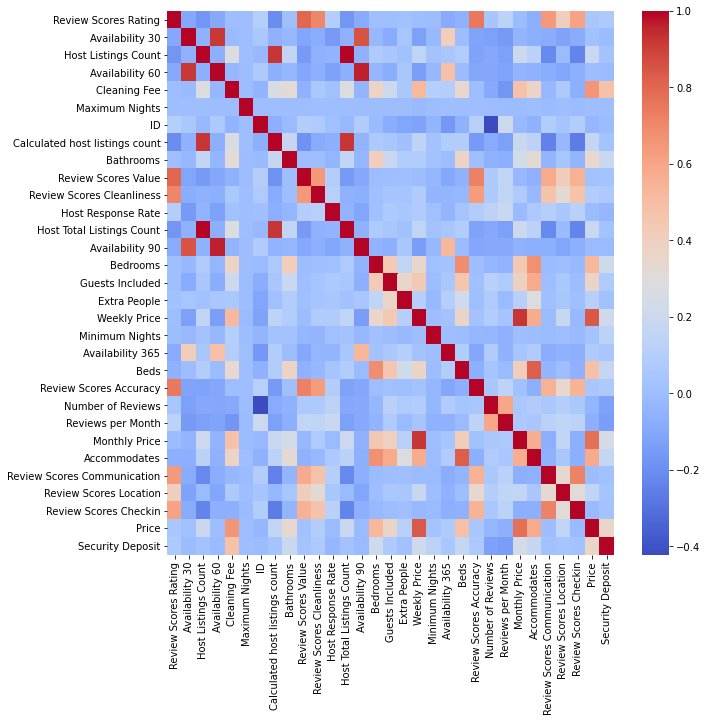

In [32]:

cor = data[numerical_vars].corr() 

plt.figure(figsize=[10,10])
sns.heatmap(cor, cmap = 'coolwarm')
plt.show()
       
        

In [33]:
#True/False mask
mask = np.triu(np.ones_like(cor, dtype=bool))
tri_df = cor.mask(mask)

# creating a list of varibles to drop
quitar = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]


# Drop the features in the to_drop list
reduced_df = data.drop(quitar, axis=1)


In [34]:
print('all variables', data.shape)
print('after removing vars:',reduced_df.shape)
print('removed variables:' ,set(data.columns) - set(reduced_df.columns))

all variables (13198, 49)
after removing vars: (13198, 47)
removed variables: {'Host Listings Count', 'Availability 60'}


In [35]:
print('numeber of cat.var:', len(categorical_vars))
print(categorical_vars)


numeber of cat.var: 18
['Property Type', 'Host Response Time', 'Bed Type', 'Neighbourhood', 'Market', 'Host Neighbourhood', 'Host Since', 'Last Review', 'Cancellation Policy', 'Host Location', 'Amenities', 'Calendar Updated', 'First Review', 'Street', 'Room Type', 'Host Verifications', 'Neighbourhood Group Cleansed', 'Neighbourhood Cleansed']


In [36]:
for i in categorical_vars:
    print(pd.crosstab(reduced_df[i], columns = 'count'))

col_0               count
Property Type            
Apartment           10883
Bed & Breakfast       337
Boat                    1
Boutique hotel          6
Bungalow                1
Camper/RV               2
Casa particular         3
Chalet                 23
Condominium           344
Dorm                   43
Earth House             3
Guest suite             3
Guesthouse             39
Hostel                 16
House                 964
Loft                  283
Other                 220
Serviced apartment     13
Tent                    1
Timeshare               1
Townhouse               8
Villa                   4
col_0               count
Host Response Time       
a few days or more    267
within a day         1522
within a few hours   2652
within an hour       7104
col_0          count
Bed Type            
Airbed             5
Couch             15
Futon             35
Pull-out Sofa    238
Real Bed       12905
col_0              count
Neighbourhood           
Acacias               7

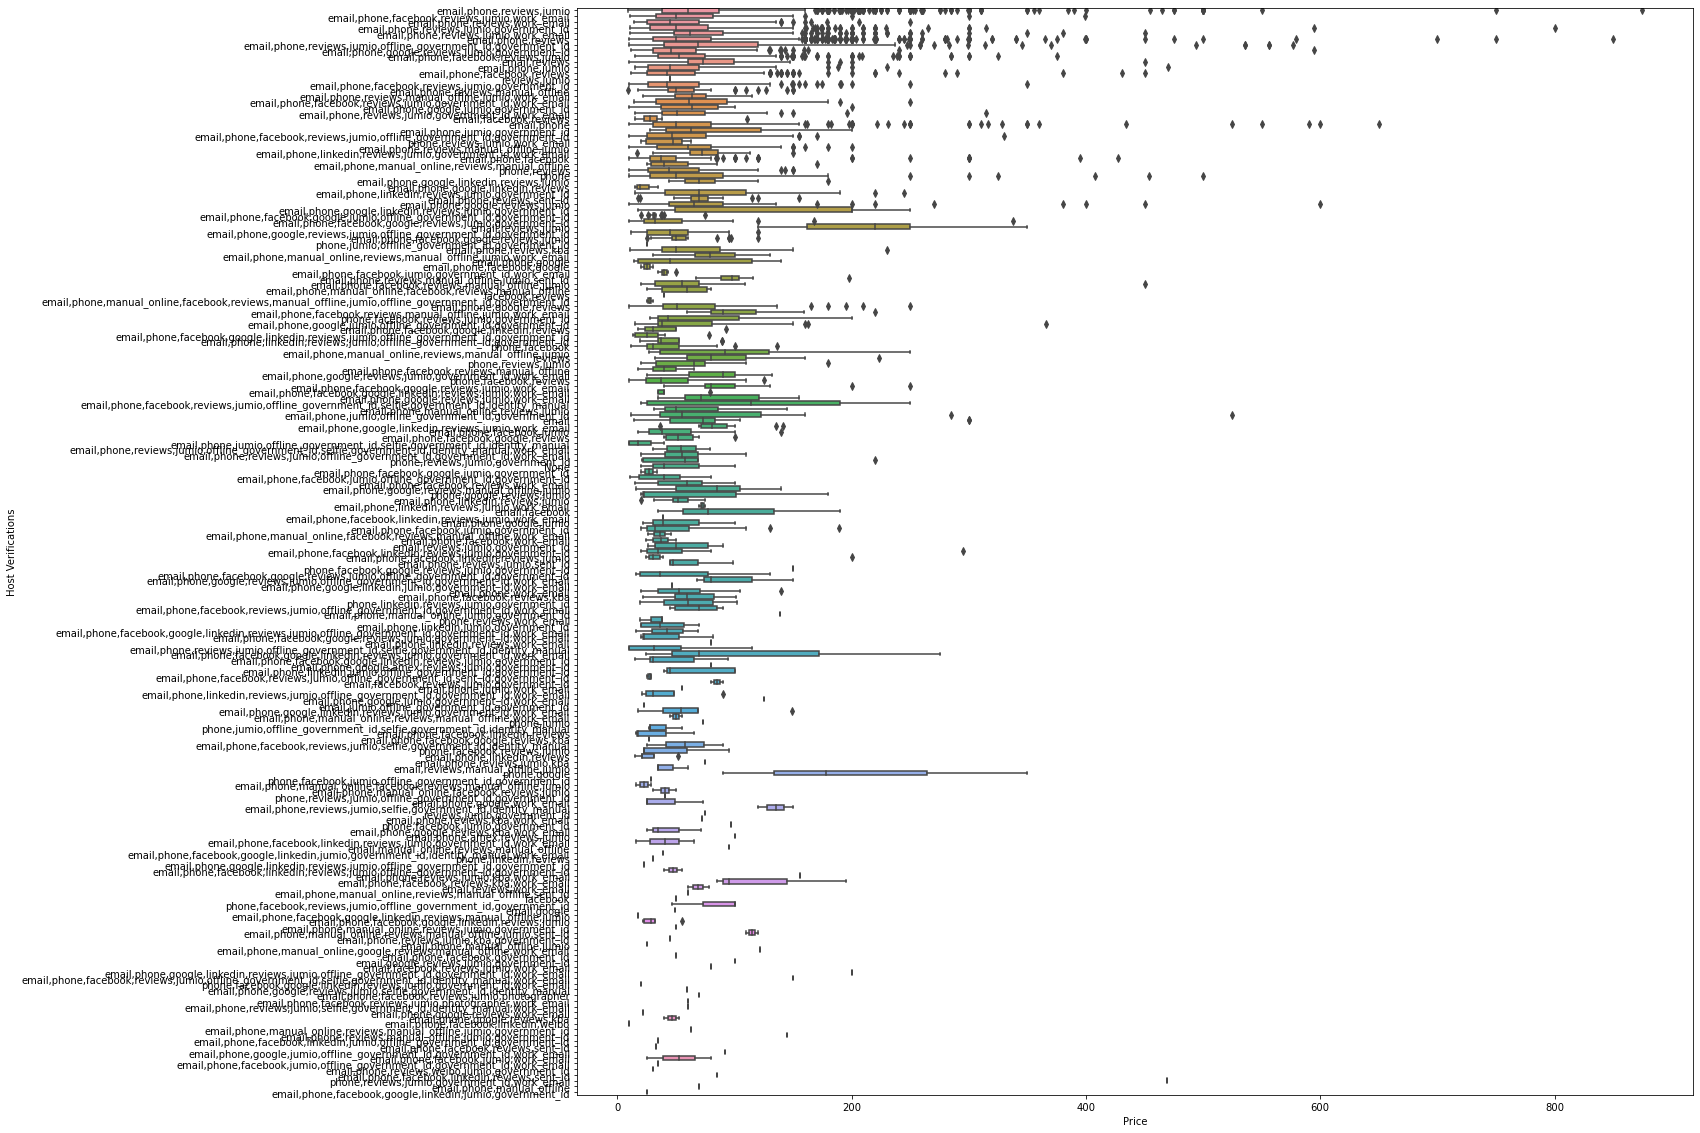

In [44]:
plt.figure(figsize=[20,20])
sns.boxplot(x = 'Price', y = 'Host Verifications', data = reduced_df)